In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
df = pd.DataFrame(iris.data, columns=[
    'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'
])


In [4]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
df['Species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [6]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
pd.unique(df[['Species']].values.ravel())

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [8]:
target_encoded_values = {"Species": {"setosa": 0, "versicolor": 1, "virginica" : 2}}

In [9]:
df = df.replace(target_encoded_values)

/tmp/ipython-input-9-914786220.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(target_encoded_values)
/tmp/ipython-input-9-914786220.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df = df.replace(target_encoded_values)


In [10]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [16]:
x = df.iloc[:, :1]
x.head()

,SepalLengthCm
0,5.1
1,4.9
2,4.7
3,4.6
4,5.0


In [17]:
y = df.iloc[:, 3:4]
y.head()

,PetalWidthCm
0,0.2
1,0.2
2,0.2
3,0.2
4,0.2


In [18]:
def plotVectors(vecs, cols):
    plt.figure()
    plt.axvline(x=0, color='#A9A9A9', zorder=0)
    plt.axhline(y=0, color='#A9A9A9', zorder=0)
    for i in range(len(vecs)):
        x = np.concatenate([[0,0],vecs[i]])
        plt.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i])

## Performing the PCA on Two Features

In [19]:
x = np.array(x).flatten()
y = np.array(y).flatten()

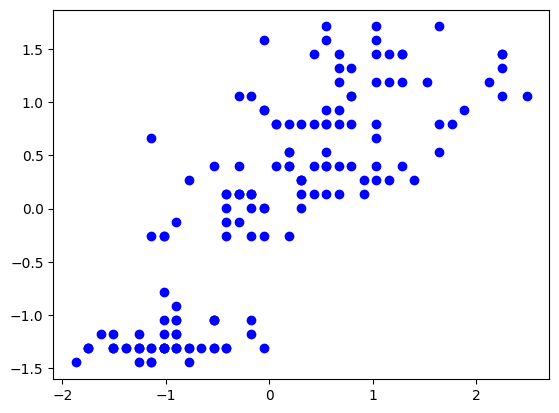

In [20]:
x = (x - np.mean(x))/(np.std(x))
y = (y - np.mean(y))/(np.std(y))
vecs = []
for i in range(len(x)):
    vecs.append((x[i], y[i]))
for items in vecs:
    vec = np.array(items)
    plt.scatter(vec[0], vec[1], c='b')

In [22]:
covXX = 0
covYY = 0
covXY = 0
covYX = 0
for i in range(len(x)):
    covXX += (x[i] - np.mean(x))*(x[i] - np.mean(x))
    covXY += (x[i] - np.mean(x))*(y[i] - np.mean(y))
    covYX += (y[i] - np.mean(y))*(x[i] - np.mean(x))
    covYY += (y[i] - np.mean(y))*(y[i] - np.mean(y))
covXX = covXX/len(x)
covXY = covXY/len(x)
covYX = covYX/len(x)
covYY = covYY/len(x)

covMatrix = np.array([[covXX,covXY],[covYX,covYY]])

print(covMatrix)

[[1.         0.81794113]
 [0.81794113 1.        ]]


In [23]:
eig_val, eig_vec = np.linalg.eig(covMatrix)


In [25]:
print(eig_val, "\n")
print(eig_vec)

[0.18205887 1.81794113] 

[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]


(-1.0, 1.0)

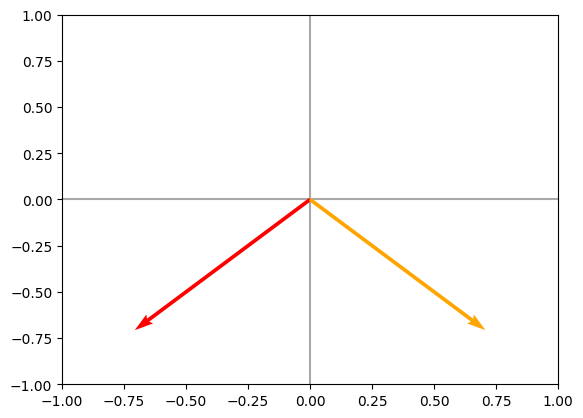

In [26]:
plotVectors([eig_vec[0].flatten(), eig_vec[1].flatten()], cols=['red', 'orange'])
plt.ylim(-1, 1)
plt.xlim(-1, 1)

In [27]:
pca1 = eig_val[1] / (eig_val[0] + eig_val[1])
pca2 = eig_val[0] / (eig_val[0] + eig_val[1])
print(pca1*100, pca2*100)

90.8970563135788 9.102943686421208


Since the data in the second eigen vector consists more significance than the first vector, we create a new vector with the second vector as it's first component and the first vector as it's second.

(2, 2) (2, 150)


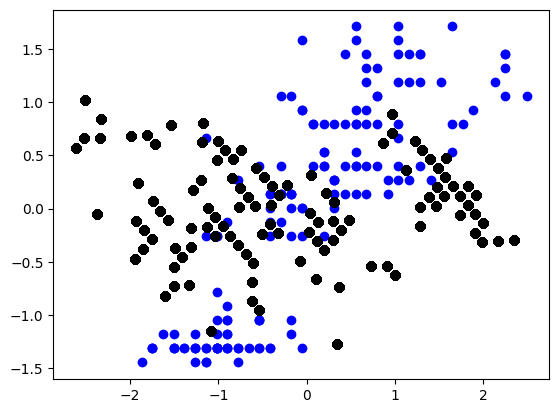

In [28]:
ds = np.array(vecs)
print(eig_vec.shape, ds.T.shape)
PCA_DS = np.matmul(eig_vec, ds.T)
PCA_DS = PCA_DS.T
for vec in vecs:
    plt.scatter(vec[0], vec[1], color='blue')
for array in PCA_DS:
    plt.scatter(PCA_DS[:, 0], PCA_DS[:, 1], color='black')

In [29]:
PCA_DS = pd.DataFrame(PCA_DS)
PCA_DS.cov()

,0,1
0,1.830142e+00,4.556965e-16
1,4.556965e-16,1.832807e-01


## Performing PCA on the whole Dataset

In [30]:
features = df.iloc[:, 0:4]
features.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [31]:
features = (features - features.mean()) / features.std()
features.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.897674,1.015602,-1.335752,-1.311052
1,-1.139200,-0.131539,-1.335752,-1.311052
2,-1.380727,0.327318,-1.392399,-1.311052
3,-1.501490,0.097889,-1.279104,-1.311052
4,-1.018437,1.245030,-1.335752,-1.311052


In [32]:
cov_matrix = features.cov()
print(cov_matrix)

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.117570       0.871754      0.817941
SepalWidthCm       -0.117570      1.000000      -0.428440     -0.366126
PetalLengthCm       0.871754     -0.428440       1.000000      0.962865
PetalWidthCm        0.817941     -0.366126       0.962865      1.000000


In [33]:
cov_matrix = np.array(cov_matrix)
cov_matrix.shape

(4, 4)

In [34]:
print(cov_matrix)

[[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]


In [35]:
eig_values, eig_vectors = np.linalg.eig(cov_matrix)
print(f'The eigen values are given as:\n{eig_values}\n\nThe Eigen Vectors are given as:\n{eig_vectors}\n\nWhere each column represents a single eigen vector.')

The eigen values are given as:
[2.91849782 0.91403047 0.14675688 0.02071484]

The Eigen Vectors are given as:
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]

Where each column represents a single eigen vector.


In [36]:
eig_vectors = eig_vectors.T
print(eig_vectors)

[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [-0.37741762 -0.92329566 -0.02449161 -0.06694199]
 [-0.71956635  0.24438178  0.14212637  0.63427274]
 [ 0.26128628 -0.12350962 -0.80144925  0.52359713]]


(-1.0, 1.0)

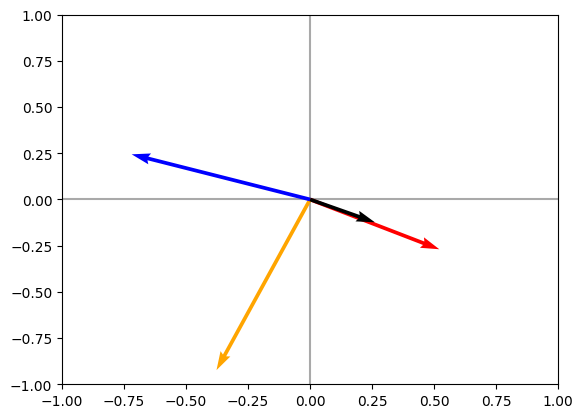

In [37]:
plotVectors([eig_vectors[0].flatten(), eig_vectors[1].flatten(), eig_vectors[2], eig_vectors[3]], cols=['red', 'orange', 'blue', 'black'])
plt.xlim(-1, 1)
plt.ylim(-1, 1)

In [38]:
indices = []
for i in range(len(eig_values)):
    sig_n = eig_values[i] / np.sum(eig_values) * 100
    print(f'The significance of PCA{i} is: {round(sig_n, 2)}%')
    if sig_n > 5:
        indices.append(i)
PCAs = eig_vectors[indices]

The significance of PCA0 is: 72.96%
The significance of PCA1 is: 22.85%
The significance of PCA2 is: 3.67%
The significance of PCA3 is: 0.52%


So the component which is less than 5%, we remove the eigen vector of that particular eigen value.

In [39]:
print(PCAs)

[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [-0.37741762 -0.92329566 -0.02449161 -0.06694199]]


(-1.0, 1.0)

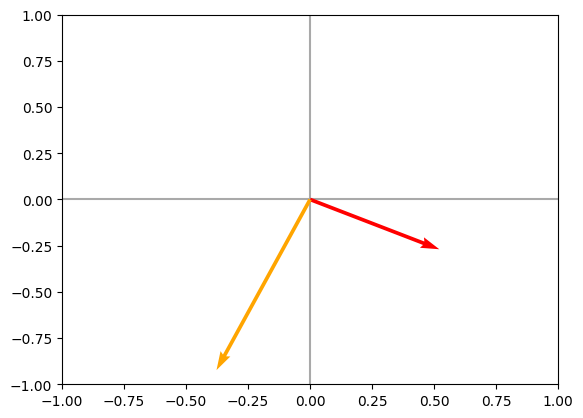

In [40]:
plotVectors([PCAs[0].flatten(), PCAs[1].flatten()], cols=['red', 'orange'])
plt.xlim(-1, 1)
plt.ylim(-1, 1)

In [41]:
#multiplying Eigen Vectors lists with our Original Feature Matrices
print(PCAs.shape, features.shape)

(2, 4) (150, 4)


In [42]:
PCA_features = np.matmul(PCAs, features.T)
PCA_features = PCA_features.T
print(PCA_features.shape)

(150, 2)


In [43]:
PCA_features.head()

,0,1
0,-2.257141,-0.478424
1,-2.074013,0.671883
2,-2.356335,0.340766
3,-2.291707,0.595400
4,-2.381863,-0.644676


In [44]:
PCA_features = PCA_features.rename(columns={0: "PC1", 1:"PC2"})
PCA_features = pd.concat([PCA_features, df['Species']], axis=1)
PCA_features.head()

,PC1,PC2,Species
0,-2.257141,-0.478424,0
1,-2.074013,0.671883,0
2,-2.356335,0.340766,0
3,-2.291707,0.595400,0
4,-2.381863,-0.644676,0


<Axes: xlabel='PC1', ylabel='PC2'>

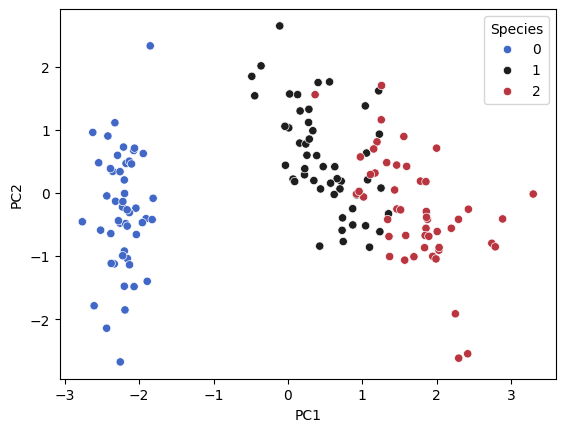

In [45]:
import seaborn as sns

sns.scatterplot(data=PCA_features, x = "PC1", y = "PC2", palette='icefire', hue="Species")

In [46]:
#Applying Singular Value Decomposition for Finding out the Principle Components


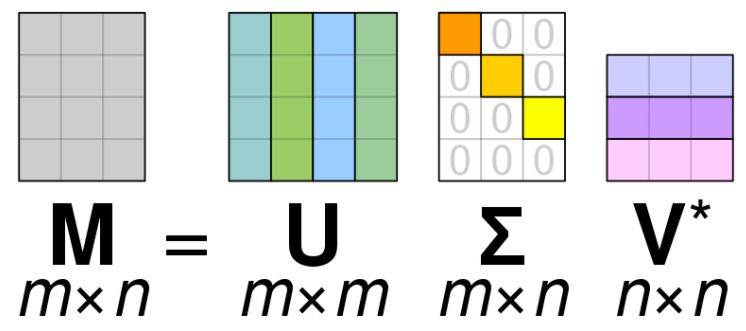

In [47]:
features = features = df.iloc[:, 0:4]
features.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [48]:
features = np.array(features)
features.shape

(150, 4)

-  feature matrix is a rectangular matrix,
- now the A'A of features matrix and call it M.
-  AA' of the feature matrix and call it N.

In [49]:
M = np.matmul(features.T, features)
N = np.matmul(features, features.T)
print(M.shape, N.shape)

(4, 4) (150, 150)


In [50]:
print(M)

[[5223.85 2673.43 3483.76 1128.14]
 [2673.43 1430.4  1674.3   531.89]
 [3483.76 1674.3  2582.71  869.11]
 [1128.14  531.89  869.11  302.33]]


In [51]:
print(N)

[[40.26 37.49 37.03 ... 51.33 51.54 48.09]
 [37.49 35.01 34.49 ... 48.53 48.6  45.41]
 [37.03 34.49 34.06 ... 47.31 47.5  44.32]
 ...
 [51.33 48.53 47.31 ... 82.29 83.18 77.47]
 [51.54 48.6  47.5  ... 83.18 84.45 78.46]
 [48.09 45.41 44.32 ... 77.47 78.46 73.06]]


In [52]:
lam_M, V = np.linalg.eig(M)
lam_N, U = np.linalg.eig(N)

In [53]:
print(lam_M)
lam_M.shape

[9.20830507e+03 3.15454317e+02 1.19780429e+01 3.55257020e+00]


(4,)

In [54]:
V = V.T
print(V)

[[ 0.75110816  0.38008617  0.51300886  0.16790754]
 [ 0.2841749   0.5467445  -0.70866455 -0.34367081]
 [ 0.50215472 -0.67524332 -0.05916621 -0.53701625]
 [ 0.32081425 -0.31725607 -0.48074507  0.75187165]]


In [55]:
indices = []
for i in range(len(lam_M)):
    sig_n = lam_M[i] / np.sum(lam_M) * 100
    print(f'The significance of PCA{i} is: {round(sig_n, 2)}%')
    if sig_n > 2:
        indices.append(i)
PCAs = V[indices]

The significance of PCA0 is: 96.53%
The significance of PCA1 is: 3.31%
The significance of PCA2 is: 0.13%
The significance of PCA3 is: 0.04%


In [56]:
print(PCAs)

[[ 0.75110816  0.38008617  0.51300886  0.16790754]
 [ 0.2841749   0.5467445  -0.70866455 -0.34367081]]


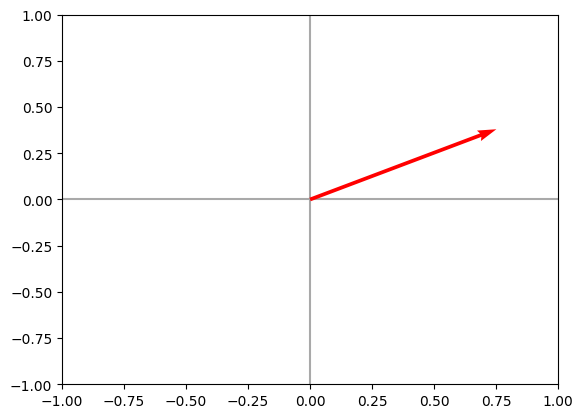

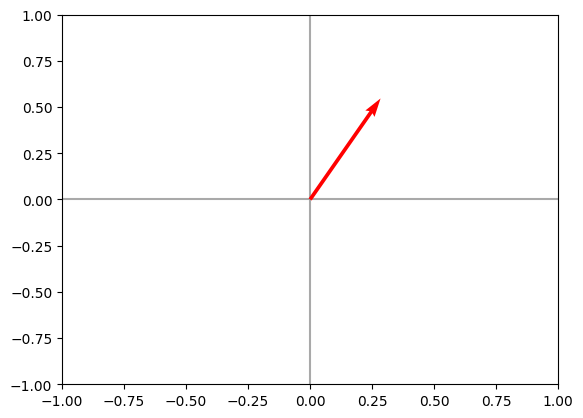

In [57]:
for vectors in PCAs:
    plotVectors([vectors], cols=['red'])
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)

In [58]:
print(PCAs.shape, features.shape)

(2, 4) (150, 4)


In [59]:
PCA_features = np.matmul(PCAs, features.T)
PCA_features = PCA_features.T
print(PCA_features.shape)

(150, 2)


In [60]:
PCA_features = pd.DataFrame(PCA_features, columns = ['PA_1', 'PA_2'])
PCA_features.head()

,PA_1,PA_2
0,5.912747,2.302033
1,5.572482,1.971826
2,5.446977,2.095206
3,5.436459,1.870382
4,5.875645,2.328290


In [61]:
PCA_features = pd.concat([PCA_features, df['Species']], axis=1)
PCA_features.head()

,PA_1,PA_2,Species
0,5.912747,2.302033,0
1,5.572482,1.971826,0
2,5.446977,2.095206,0
3,5.436459,1.870382,0
4,5.875645,2.328290,0


<Axes: xlabel='PA_1', ylabel='PA_2'>

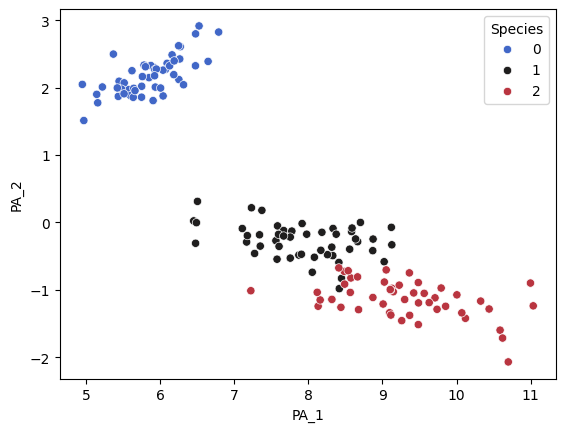

In [62]:
sns.scatterplot(data=PCA_features, x = "PA_1", y = "PA_2", palette='icefire', hue="Species")